clean the data 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv("dataset.csv")  

# Criar os dois datasets
df_enrolled = df[df["Target"] == "Enrolled"]
df_new = df[df["Target"] != "Enrolled"]

# Salvar se necessário
df_enrolled.to_csv("students_enrolled.csv", index=False)
df_new.to_csv("students_not_enrolled.csv", index=False)

we can see that the data doesn't have null values

In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0]) 

Series([], dtype: int64)


the data doesn't have duplicates too 

In [ ]:
# Contar duplicatas
print("Duplicatas:", df.duplicated().sum())


Duplicatas: 0


In [10]:
# Criar uma variável binária (1 = Dropout, 0 = Não Dropout)
df_new["Dropout"] = df_new["Target"].apply(lambda x: 1 if x == "Dropout" else 0)

df_new.drop(columns=["Target"], inplace=True)
df_new

/var/folders/mg/trj2dw9n74q5lcbvnrpm0lkw0000gn/T/ipykernel_60428/2049618524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Dropout"] = df_new["Target"].apply(lambda x: 1 if x == "Dropout" else 0)
/var/folders/mg/trj2dw9n74q5lcbvnrpm0lkw0000gn/T/ipykernel_60428/2049618524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=["Target"], inplace=True)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


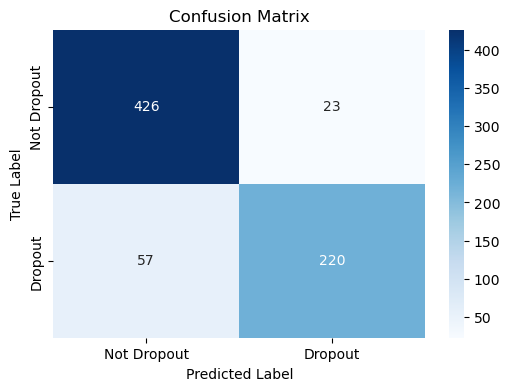

Accuracy: 0.8898071625344353
Classification Report:
               precision    recall  f1-score   support

 Not Dropout       0.88      0.95      0.91       449
     Dropout       0.91      0.79      0.85       277

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



In [18]:
df_new = pd.get_dummies(df_new, drop_first=True)

X = df_new.drop(columns=["Dropout"])  
y = df_new["Dropout"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # max_depth evita overfitting

# Treinar o modelo
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Dropout", "Dropout"], yticklabels=["Not Dropout", "Dropout"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Exibir métricas de desempenho
print("Accuracy:", accuracy_score(y_test, y_pred))

# Exibir relatório de classificação (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred, target_names=["Not Dropout", "Dropout"])
print("Classification Report:\n", report)



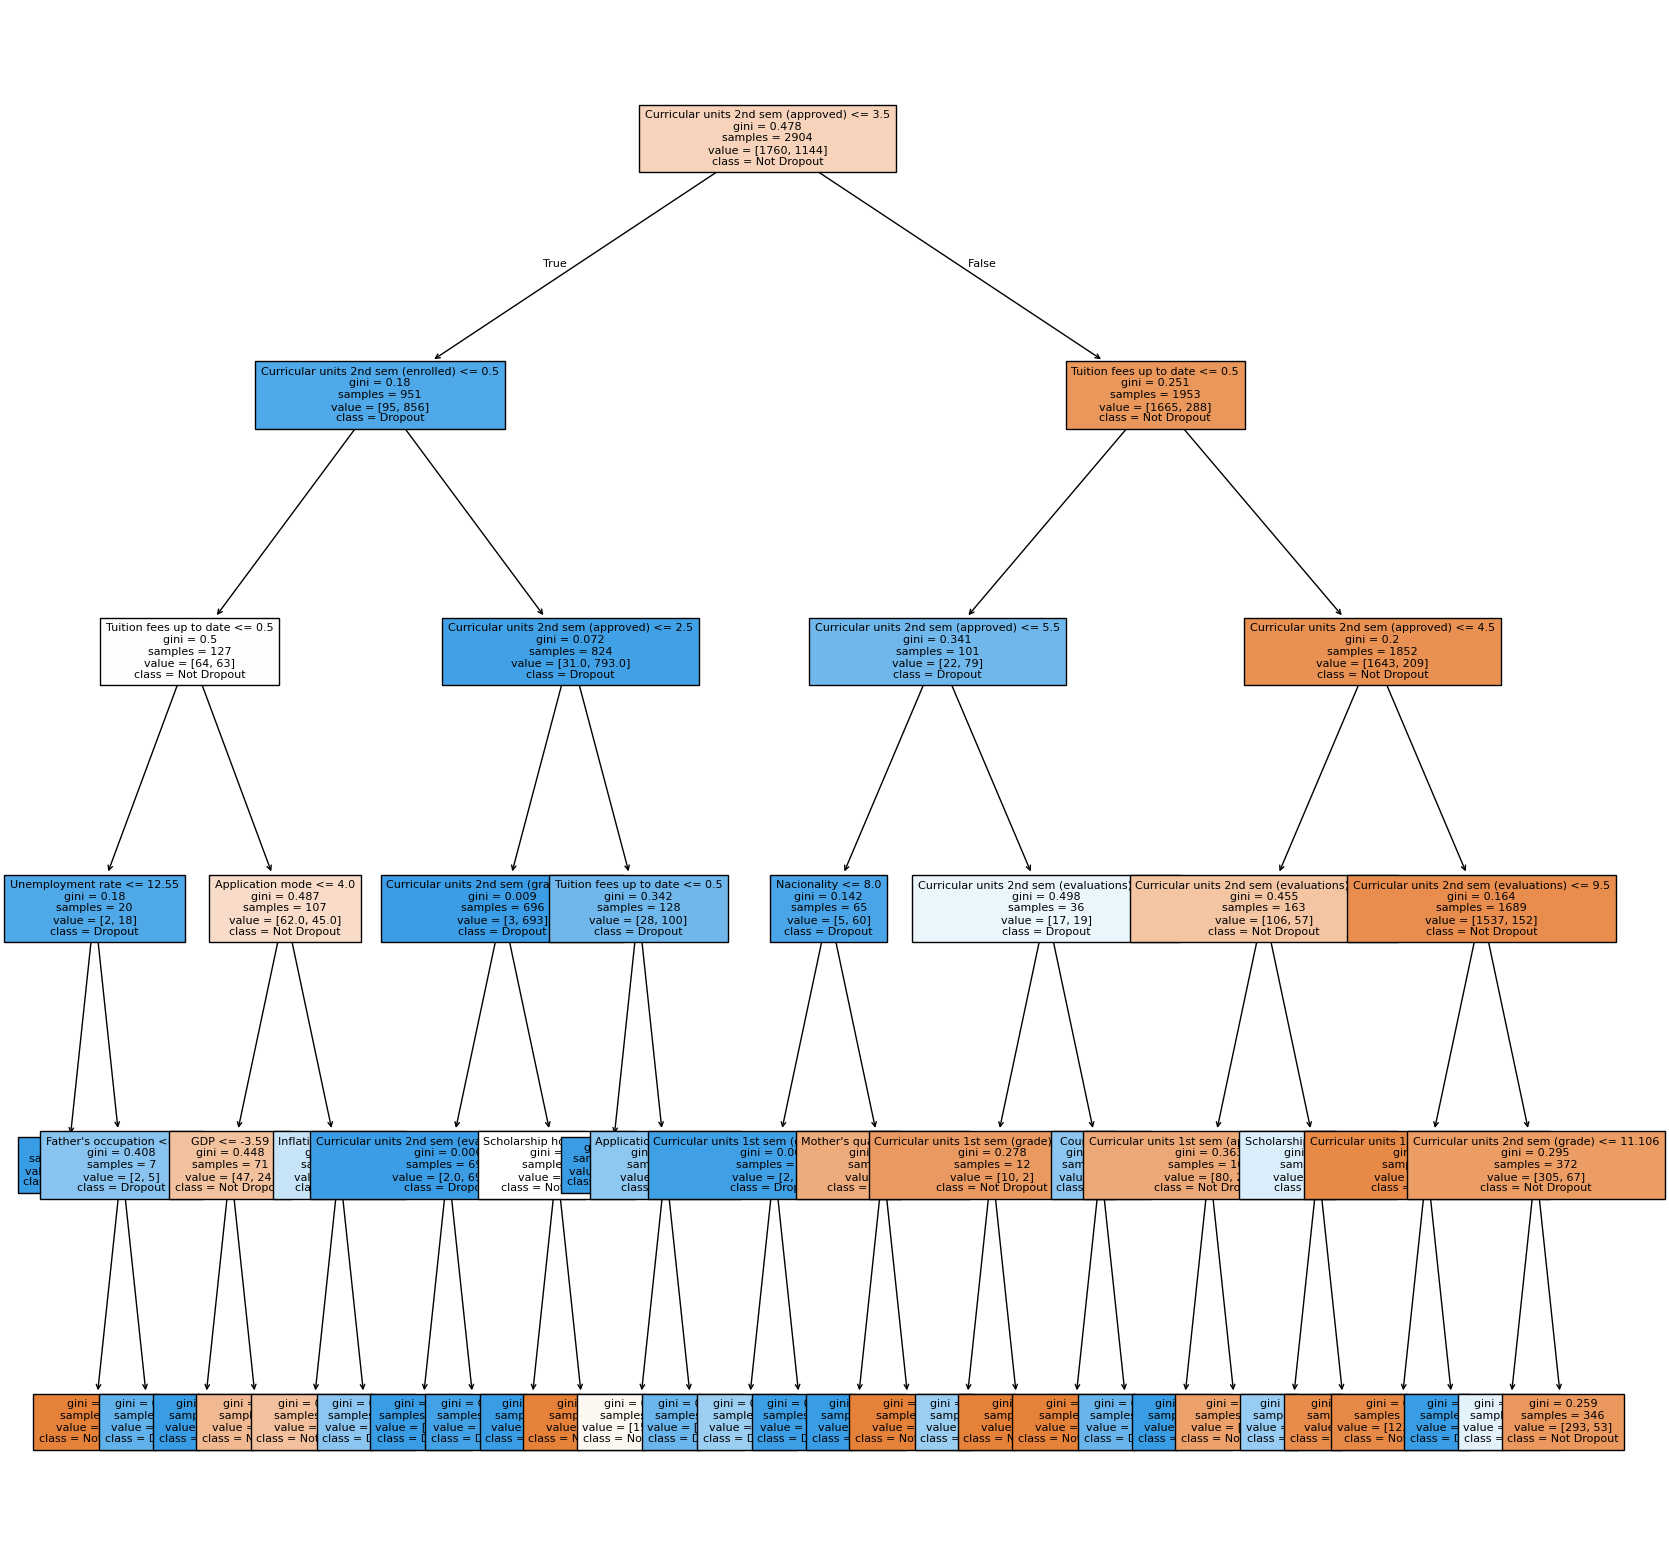

In [21]:
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=X.columns, class_names=["Not Dropout", "Dropout"], filled=True, fontsize=8)
plt.show()

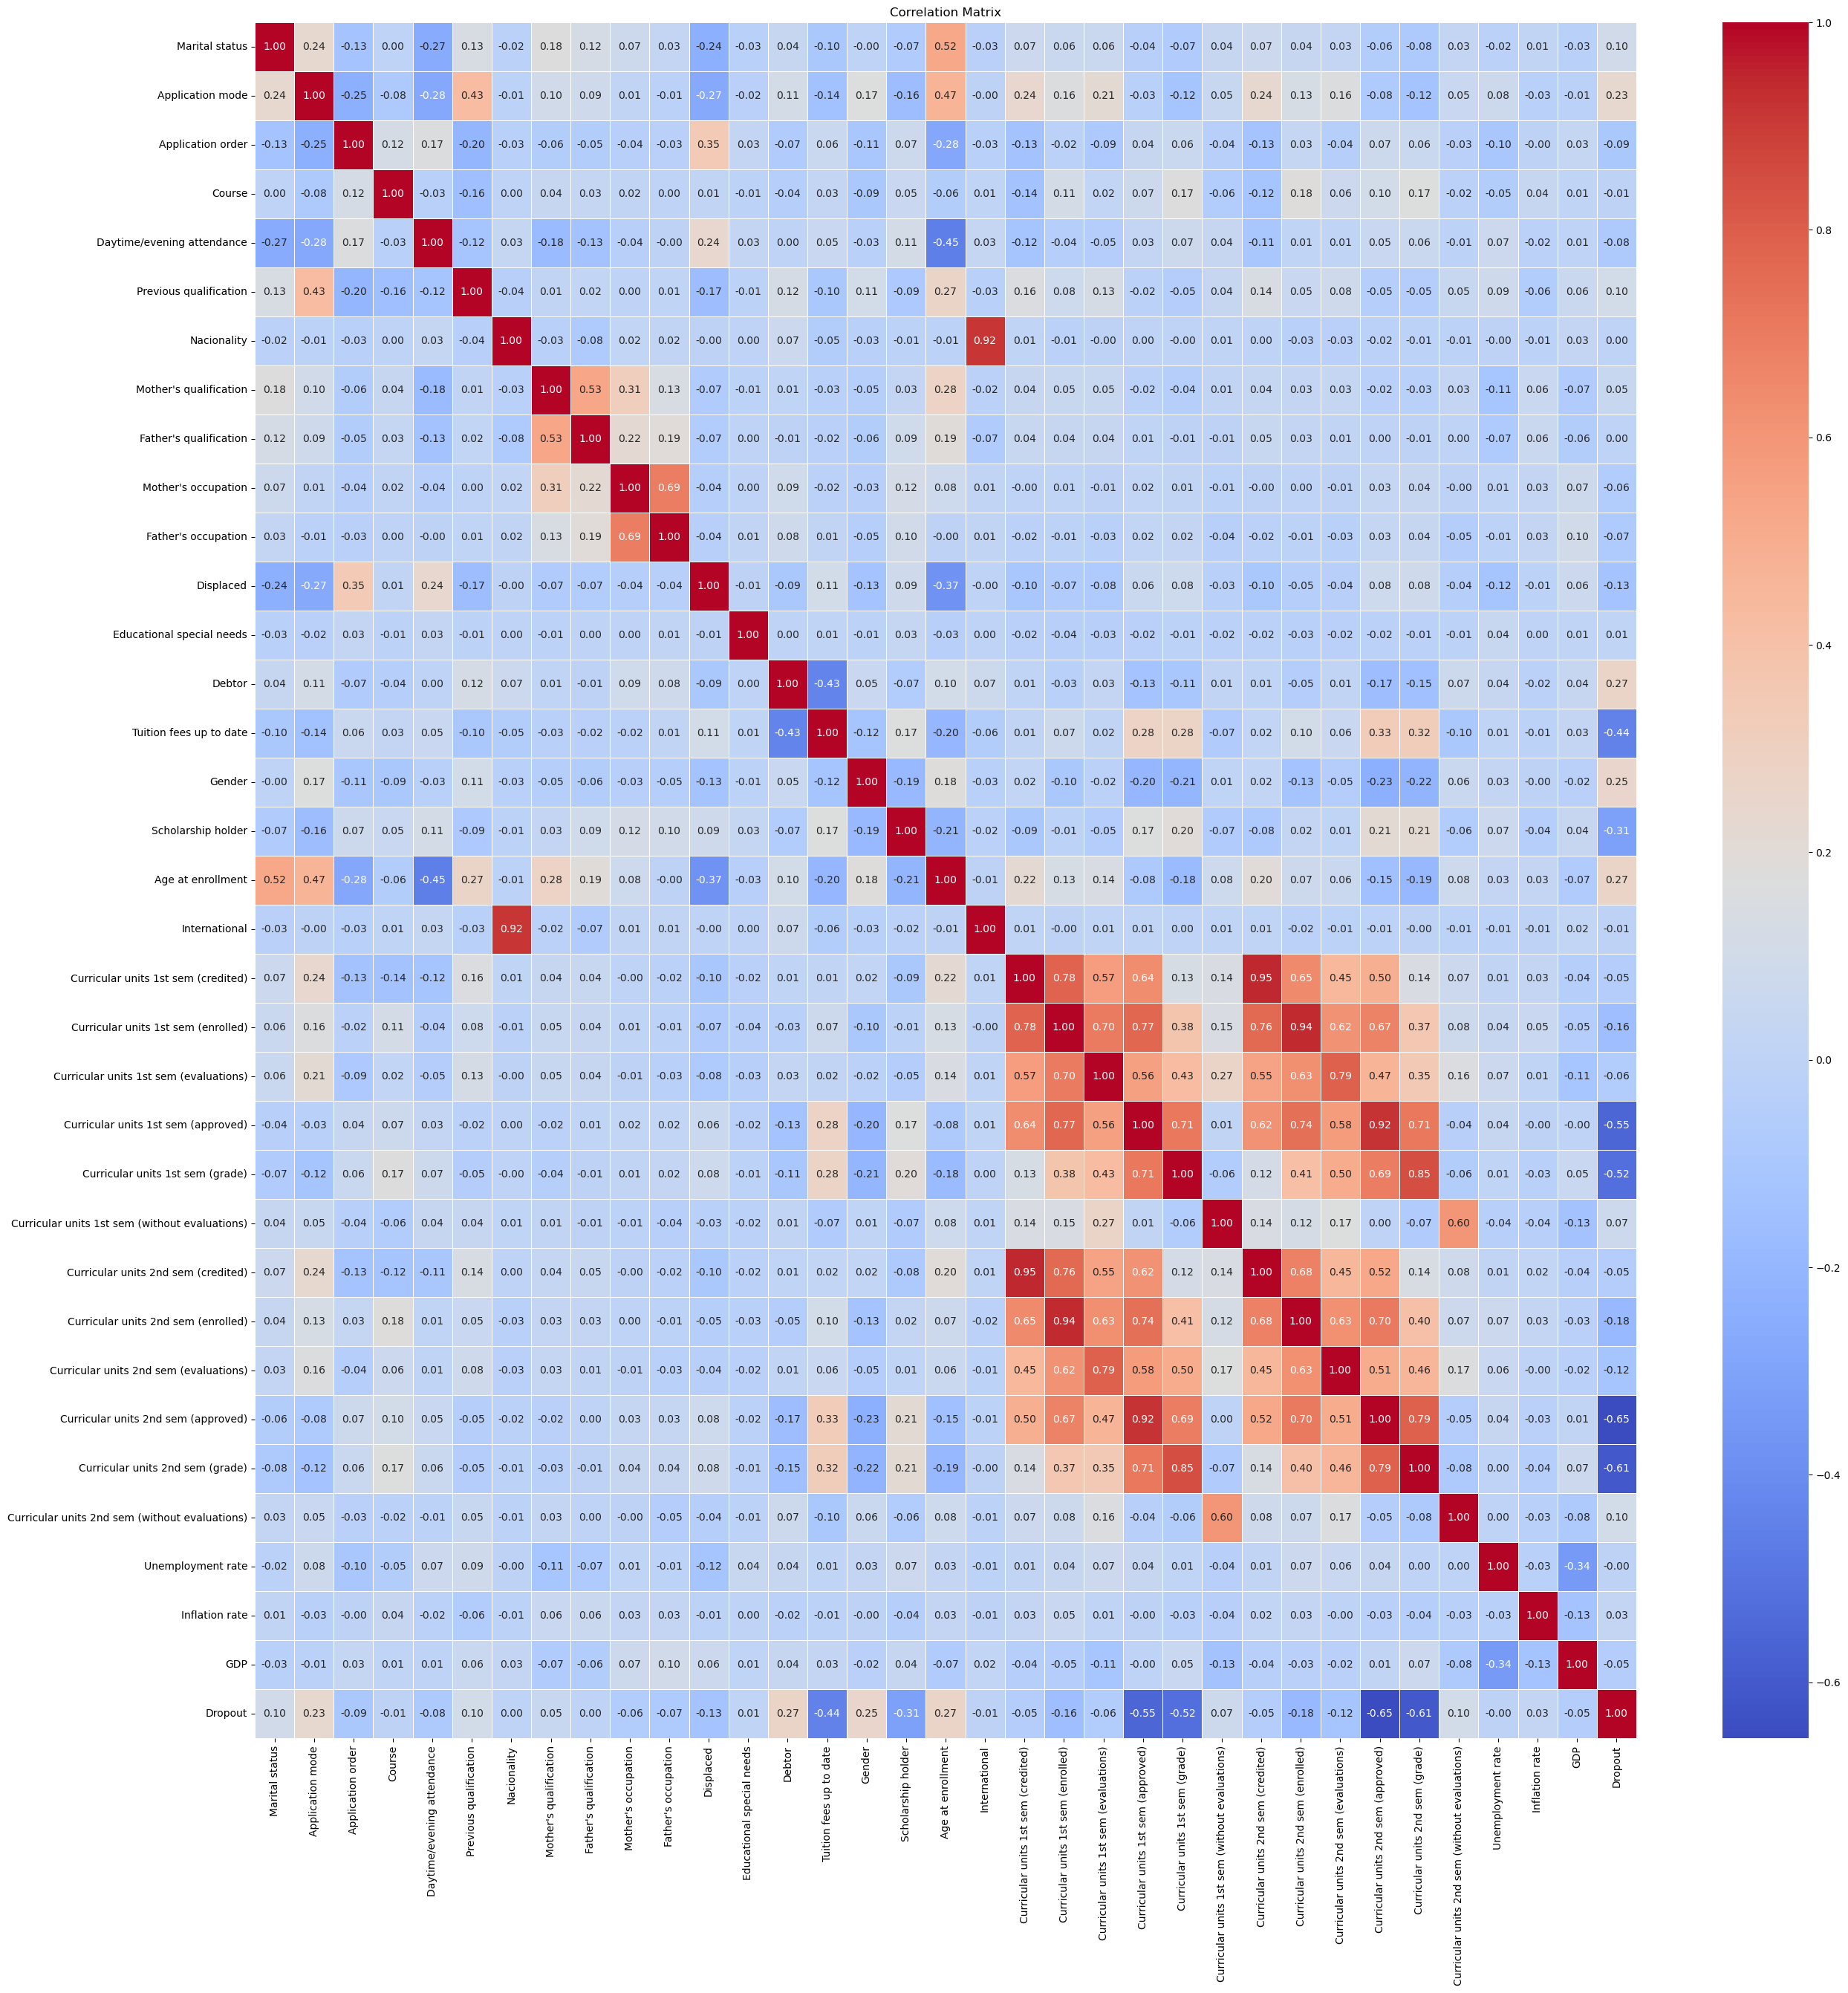

In [24]:
corr_matrix = df_new.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

we can observe from the correlation matrix that the variables that havr the strogest correlation with the dropouts are 'Curricular units 2end sem (grade)' , ' Curricular units 2end sem (approved)' , 'Curricular units 2end sem (grade)', 'Curricular units 2end sem (approved)', 'scholarship holder', 'tuiton fets up to date ', 
the variables that have a relation but not that strong are ' agr and envirement' , 'gender' , 'debtor', 'application mode' 
now we are going to do a decision tree with the strogger datas and another with all the data above 

In [28]:
# Features with the strongest correlation
strong_features = [
    "Curricular units 2nd sem (grade)", 
    "Curricular units 2nd sem (approved)", 
    "Scholarship holder", 
    "Tuition fees up to date"
]

# Features with moderate correlation
moderate_features = [
    "Age at enrollment", 
    "Gender", 
    "Debtor", 
    "Application mode"
]

# Creating two feature sets
X_strong = df_new[strong_features]  # Only strong correlation features
X_all = df_new[strong_features + moderate_features]  # Strong + moderate correlation features
y = df_new["Dropout"]  # Target variable


In [30]:
# Splitting data for both models
X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(X_strong, y, test_size=0.2, random_state=42)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)


In [31]:
tree_strong = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_all = DecisionTreeClassifier(max_depth=5, random_state=42)

tree_strong.fit(X_train_strong, y_train_strong)
tree_all.fit(X_train_all, y_train_all)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [32]:
# Predictions
y_pred_strong = tree_strong.predict(X_test_strong)
y_pred_all = tree_all.predict(X_test_all)

In [33]:
# Metrics for the model with strong correlation features
print("Decision Tree with Strong Features:")
print("Accuracy:", accuracy_score(y_test_strong, y_pred_strong))
print("Confusion Matrix:\n", confusion_matrix(y_test_strong, y_pred_strong))
print("Classification Report:\n", classification_report(y_test_strong, y_pred_strong))

Decision Tree with Strong Features:
Accuracy: 0.8870523415977961
Confusion Matrix:
 [[422  27]
 [ 55 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       449
           1       0.89      0.80      0.84       277

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



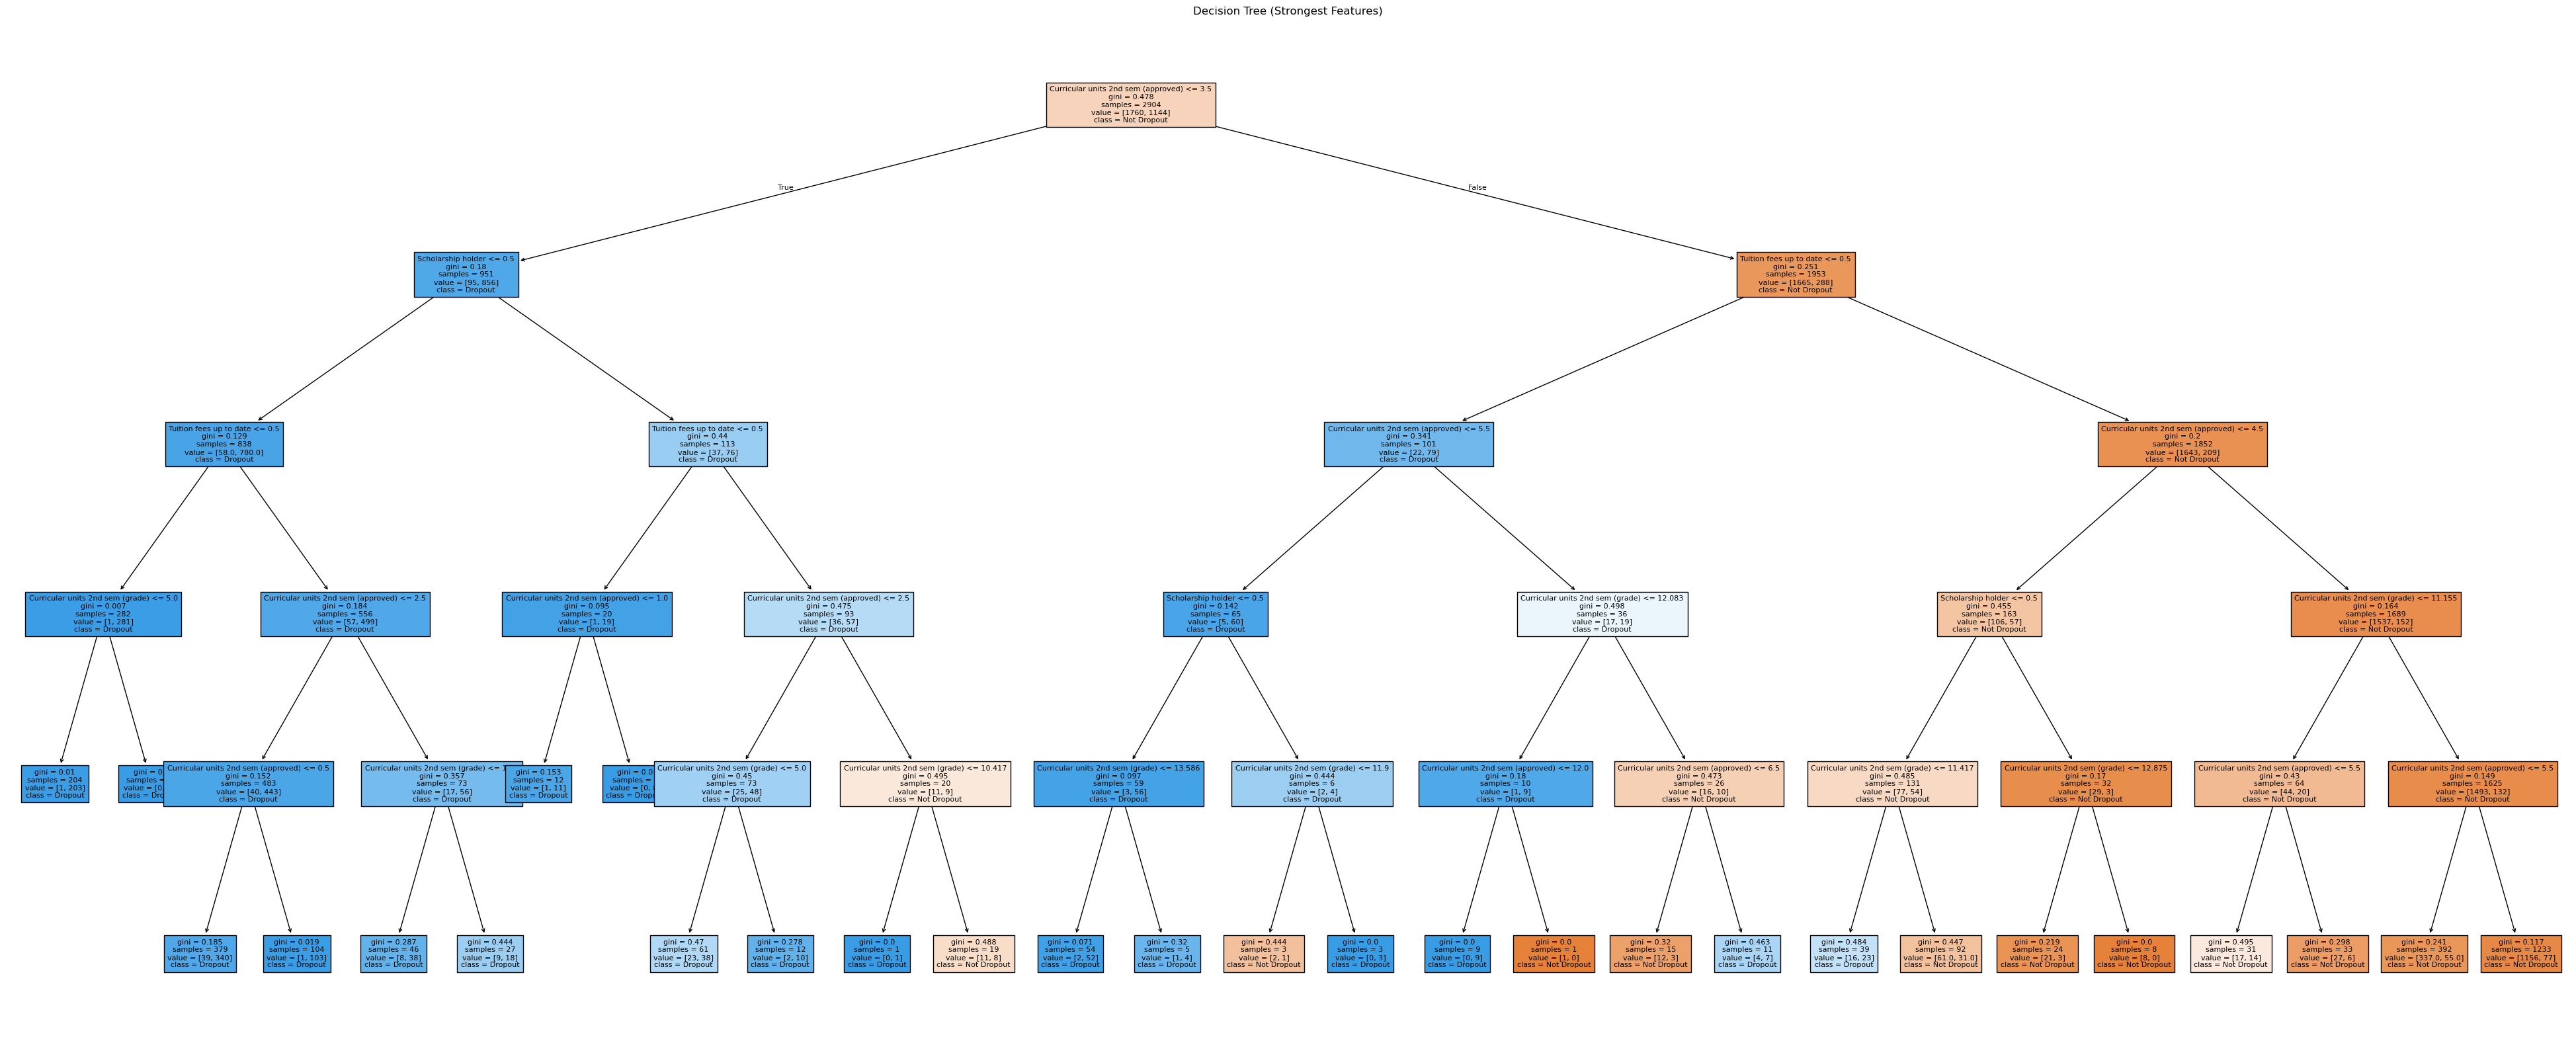

In [39]:
# Plot Decision Tree with strong features
plt.figure(figsize=(50, 20))
plot_tree(tree_strong, feature_names=X_strong.columns, class_names=["Not Dropout", "Dropout"], filled=True, fontsize=8)
plt.title("Decision Tree (Strongest Features)")
plt.show()

In [34]:
# Metrics for the model with all relevant features
print("\nDecision Tree with All Correlated Features:")
print("Accuracy:", accuracy_score(y_test_all, y_pred_all))
print("Confusion Matrix:\n", confusion_matrix(y_test_all, y_pred_all))
print("Classification Report:\n", classification_report(y_test_all, y_pred_all))


Decision Tree with All Correlated Features:
Accuracy: 0.8842975206611571
Confusion Matrix:
 [[425  24]
 [ 60 217]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       449
           1       0.90      0.78      0.84       277

    accuracy                           0.88       726
   macro avg       0.89      0.86      0.87       726
weighted avg       0.89      0.88      0.88       726



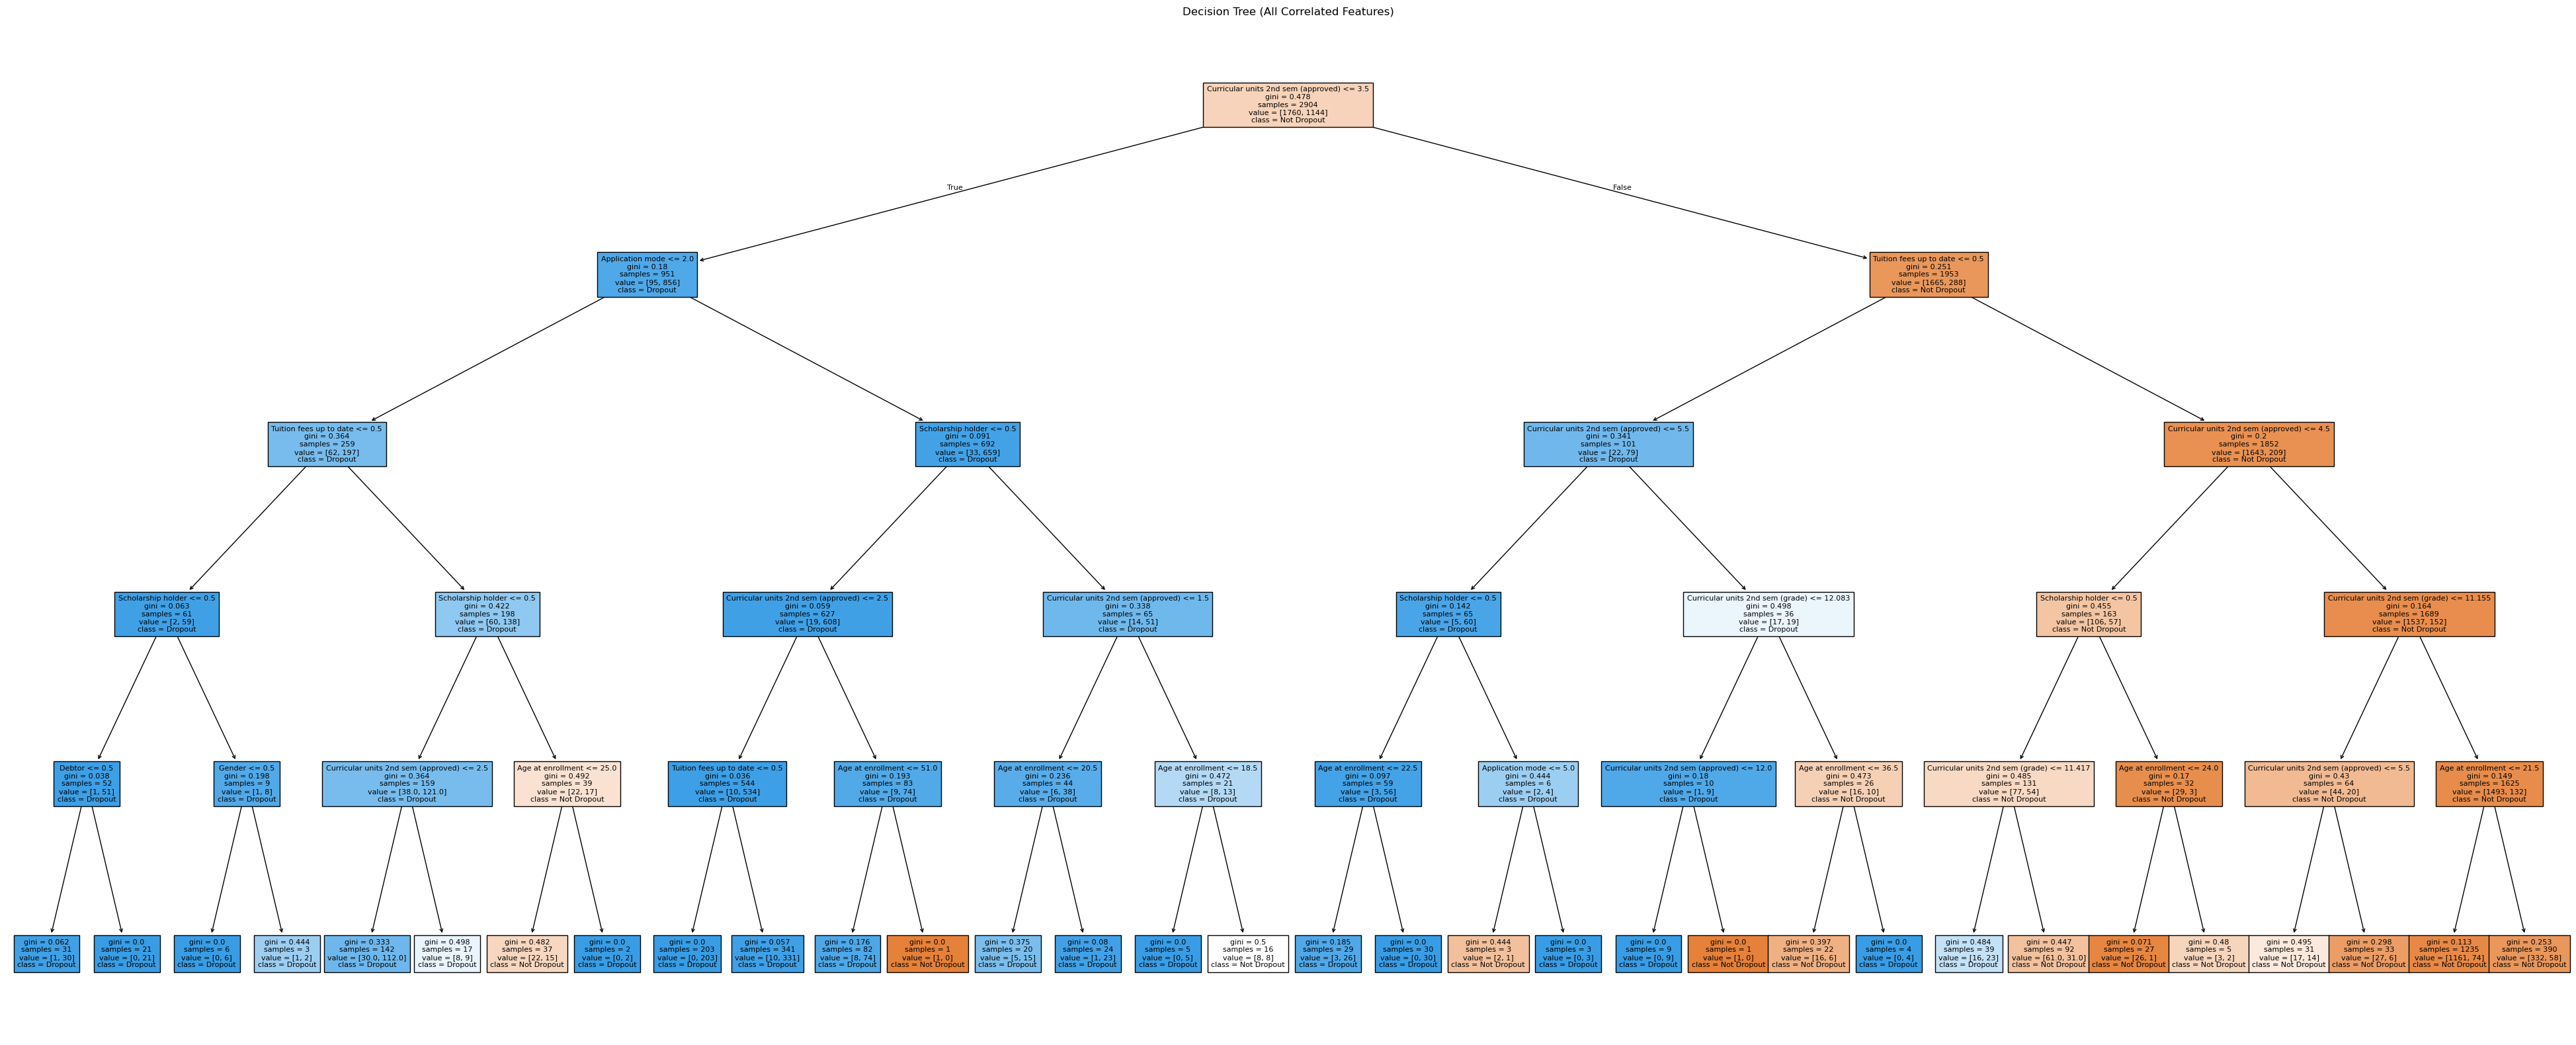

In [42]:
# Plot Decision Tree with all correlated features
plt.figure(figsize=(50, 20))
plot_tree(tree_all, feature_names=X_all.columns, class_names=["Not Dropout", "Dropout"], filled=True, fontsize=8)
plt.title("Decision Tree (All Correlated Features)")
plt.show()